In [ ]:
import json

# 读取文件
file_path = "/home/niqi/workspace/rPPG-Toolbox/vppgdata/PURE/RawData/01-01/01-01.json"  # 将路径替换为实际文件路径
with open(file_path, 'r') as file:
    data = json.load(file)

# 提取脉率信息
for entry in data["/FullPackage"]:
    timestamp = entry["Timestamp"]
    pulse_rate = entry["Value"]["pulseRate"]
    print(f"Timestamp: {timestamp}, Pulse Rate: {pulse_rate}")


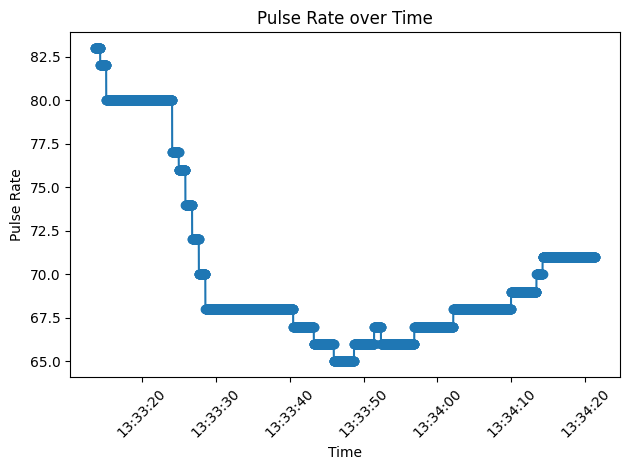

In [2]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# 读取文件
# file_path = "/path/to/your/file.json"  # 将路径替换为实际文件路径
with open(file_path, 'r') as file:
    data = json.load(file)

# 提取脉率和时间信息
timestamps = []
pulse_rates = []

for entry in data["/FullPackage"]:
    timestamp = entry["Timestamp"]
    pulse_rate = entry["Value"]["pulseRate"]

    # 将纳秒时间戳转换为秒
    timestamp_seconds = timestamp / 1e9
    timestamps.append(datetime.utcfromtimestamp(timestamp_seconds))
    pulse_rates.append(pulse_rate)

# 绘制折线图
plt.plot(timestamps, pulse_rates, marker='o')
plt.xlabel('Time')
plt.ylabel('Pulse Rate')
plt.title('Pulse Rate over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


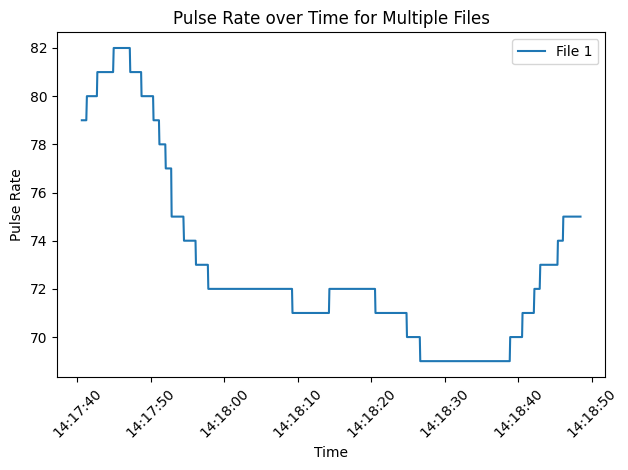

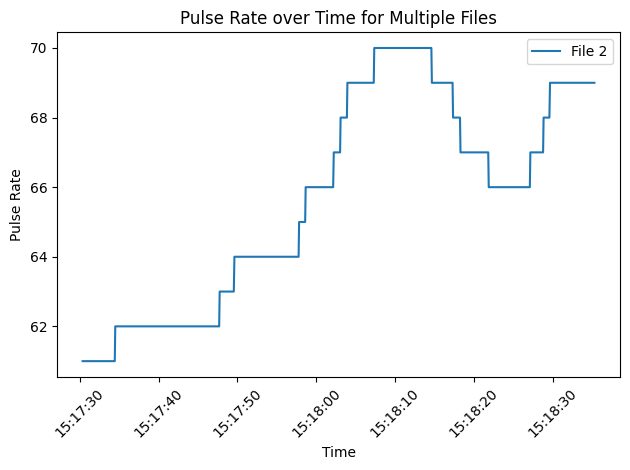

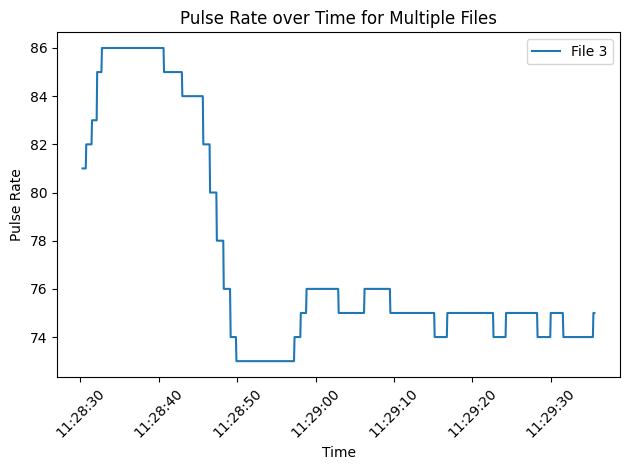

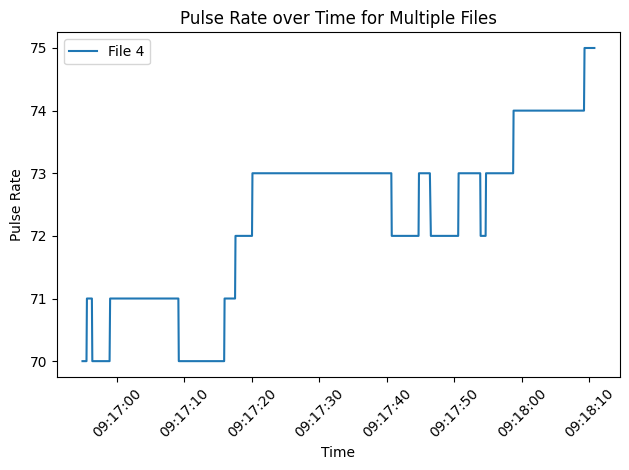

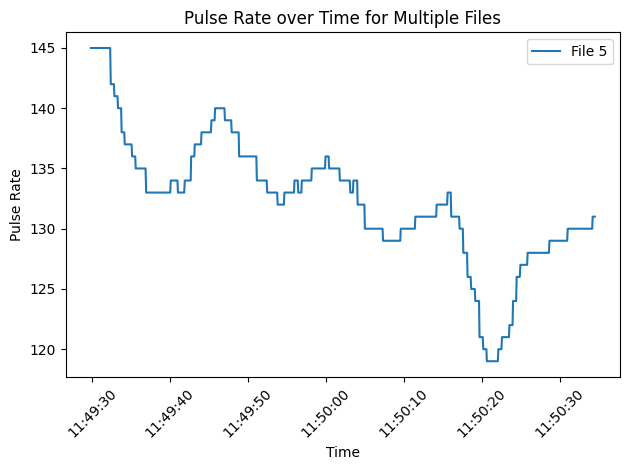

In [8]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
import os

# 文件夹路径
folder_path = "/home/niqi/workspace/rPPG-Toolbox/vppgdata/PURE/RawData/"

# 存储所有脉率和时间信息的列表
all_timestamps = []
all_pulse_rates = []

# 处理文件夹中的每个文件
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith(".json"):
            file_path = os.path.join(root, file_name)

            # 读取文件
            with open(file_path, 'r') as file:
                data = json.load(file)

            # 提取脉率和时间信息
            timestamps = []
            pulse_rates = []
            for entry in data["/FullPackage"]:
                timestamp = entry["Timestamp"]
                pulse_rate = entry["Value"]["pulseRate"]

                # 将纳秒时间戳转换为秒
                timestamp_seconds = timestamp / 1e9
                timestamps.append(datetime.utcfromtimestamp(timestamp_seconds))
                pulse_rates.append(pulse_rate)
            #pulse_rates per second:
            pulse_rates = pulse_rates[::4]
            timestamps = timestamps[::4]
            # 存储到总列表中
            all_timestamps.append(timestamps)
            all_pulse_rates.append(pulse_rates)
import csv
csv_file_path = "./pulserate.csv"  # 替换为实际输出路径
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # 写入表头
    csv_writer.writerow([f'Second_{i+1}' for i in range(len(all_pulse_rates[0]))])

    # 写入每行数据
    for i, pulse_rates in enumerate(all_pulse_rates):
        csv_writer.writerow(pulse_rates)
# 绘制折线图
for i in range(5):
    
    plt.plot(all_timestamps[i], all_pulse_rates[i], label=f'File {i+1}')

    plt.xlabel('Time')
    plt.ylabel('Pulse Rate')
    plt.title('Pulse Rate over Time for Multiple Files')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()